In [ ]:
"""
markets.ipynb

Jupyter Notebook to perform analysis on card market data.

Author: Jordan Bourdeau
Date Created: 4/7/24
"""

In [ ]:
# Imports
import datetime
import json 
from matplotlib import pyplot as plt
import numpy as np
import os 
import pandas as pd

from src import constants as c
import src.load.load_price_data as lpd
import src.load.load_set_data as lsd
import src.load.load_utils as load_utils

### Get a DataFrame with a card name, lowest price + the set it's from, UUID, and release year

Note: Some cards may not have a MTGO online version, for instance if there is a full art version only sold in paper copies.

In [ ]:
card_price_df: pd.DataFrame = lpd.load_card_price_df()
card_price_df.head()

In [77]:
def calculate_aggregate_set_prices(card_price_df: pd.DataFrame) -> pd.DataFrame:
    """
    Function to calculate aggregate set prices from the market price data.

    :param card_price_df: Pandas dataframe with market price information.

    :returns: Dataframe with aggregate statistics.
    """
    # Don't count promos- ignore sets with a s
    agg_set_df: pd.DataFrame = card_price_df.groupby(['set'])['price'].agg(['mean', 'median', 'std']).reset_index().sort_values(by=['mean'], ascending=False)
    return agg_set_df[~agg_set_df['std'].isnull()]

calculate_aggregate_set_prices(card_price_df)

,set,mean,median,std
128,MPS,7.285000,7.285,4.645692
22,BOT,6.240000,3.710,6.332140
70,EXP,5.550000,1.190,9.255229
10,AFC,5.452308,3.110,4.777224
124,MOC,4.794412,4.020,5.023619
...,...,...,...,...
203,XLN,0.018304,0.020,0.015190
145,PD2,0.017500,0.010,0.013887
7,9ED,0.017263,0.020,0.006264
84,ISD,0.016963,0.020,0.016319


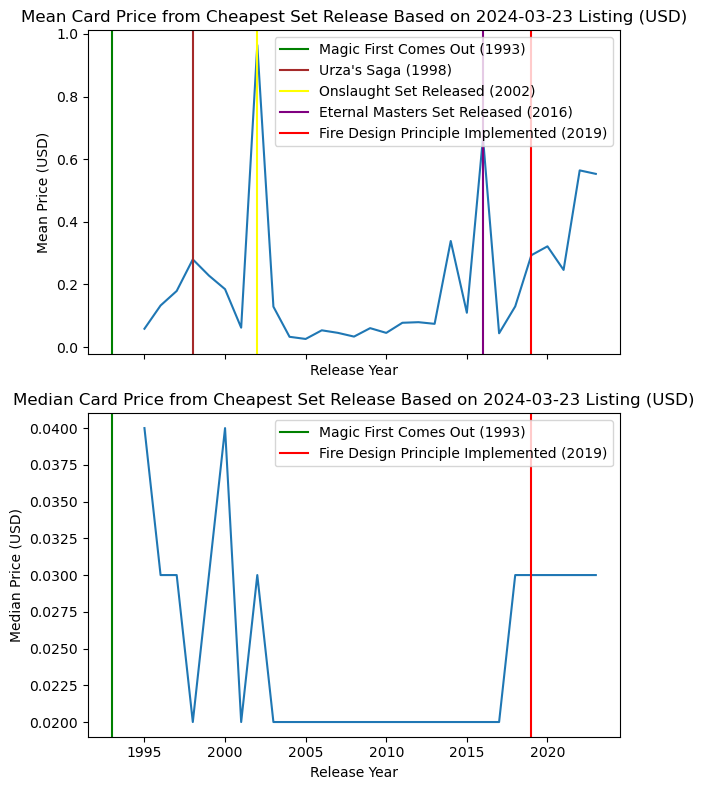

In [73]:
def plot_average_card_price_over_time(
        card_price_df: pd.DataFrame, 
        listing_date: datetime.date, 
        start_year: int = 1993, 
        end_year: int = 2023
    ):
    """
    Function which plots the average card price based on the year of the set 
    it is the least expensive in came out.

    :param card_price_df: Pandas dataframe containing market price data.
    :param listing_date:  Date which card listings are gathered from.        
    :param start_year:    Start of the year window to look at (inclusive). Defaults to 1993 (when Magic came out).
    :param end_year:      End of the year window to look at (inclusive). Defaults to 2023 (whole year increment from analysis). 

    :returns: Outputs plot and saves it.
    """
    agg_df: pd.DataFrame = card_price_df.groupby(['release_year'])['price'].agg(['mean', 'median', 'std']).reset_index()
    trimmed_df: pd.DataFrame = agg_df[(agg_df['release_year'] >= start_year) & (agg_df['release_year'] <= end_year)]

    fig, (mean_plot, median_plot) = plt.subplots(2, 1, sharex=True)
    fig.set_figheight(8)

    # Mean plot
    mean_plot.set_xlabel('Release Year')
    mean_plot.set_ylabel('Mean Price (USD)')
    mean_plot.set_title(f'Mean Card Price from Cheapest Set Release Based on {listing_date} Listing (USD)')
    mean_plot.plot(trimmed_df['release_year'], trimmed_df['mean'])
    mean_plot.axvline(1993, color='green', label='Magic First Comes Out (1993)')
    mean_plot.axvline(1998, color='brown', label='Urza\'s Saga (1998)')
    mean_plot.axvline(2002, color='yellow', label='Onslaught Set Released (2002)')
    mean_plot.axvline(2016, color='purple', label='Eternal Masters Set Released (2016)')
    mean_plot.axvline(2019, color='red', label='Fire Design Principle Implemented (2019)')
    mean_plot.legend()

    # Median plot
    median_plot.set_xlabel('Release Year')
    median_plot.set_ylabel('Median Price (USD)')
    median_plot.set_title(f'Median Card Price from Cheapest Set Release Based on {listing_date} Listing (USD)')
    median_plot.plot(trimmed_df['release_year'], trimmed_df['median'])
    median_plot.axvline(1993, color='green', label='Magic First Comes Out (1993)')
    median_plot.axvline(2019, color='red', label='Fire Design Principle Implemented (2019)')
    median_plot.legend()

    caption: str = "The set a card is associated with is drawn from the set where it has the cheapest price, as per the daily listings.\
    "
    # fig.figtext(x=0, y=-0.1, s=caption, wrap=True, horizontalalignment='left')
    fig.tight_layout()


plot_average_card_price_over_time(card_price_df, datetime.date(2024, 3, 23))